In [2]:
import numpy as np

In [4]:
freq1, freq2, offset1, offset2 = np.random.rand(4, 10, 1)
time = np.linspace(0,1,10)

In [5]:
series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))

In [6]:
series

array([[ 0.36748683, -0.28183518, -0.44968351,  0.15068586,  0.49363075,
        -0.00671941, -0.49559045, -0.13781858,  0.45539593,  0.27063392],
       [-0.15665388,  0.4834453 ,  0.0980685 , -0.49532954, -0.03804295,
         0.4999397 , -0.02254127, -0.49720808,  0.08279446,  0.48717479],
       [-0.45848618,  0.05891362,  0.3990758 , -0.46135444,  0.0661688 ,
         0.3946277 , -0.46412402,  0.07340983,  0.39009519, -0.46679432],
       [-0.18545022, -0.48850383,  0.02485391,  0.49667459,  0.13842855,
        -0.45116601, -0.28675   ,  0.35689655,  0.40408024, -0.22405461],
       [-0.15677607,  0.42249809,  0.36198671, -0.24667831, -0.4818003 ,
         0.01266412,  0.48795136,  0.22433768, -0.37898879, -0.40841551],
       [-0.4981476 ,  0.32917327,  0.10894986, -0.45799005,  0.43255429,
        -0.05344015, -0.36936937,  0.49016371, -0.21017529, -0.24166314],
       [-0.45273639, -0.03643936,  0.47877495, -0.30567986, -0.26034465,
         0.49171488, -0.09102109, -0.42667375

In [9]:
def generate_time_series(batch_size, n_steps):
    
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [10]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [13]:
from tensorflow import keras

In [14]:
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020792296

In [22]:
x_valid.shape

(2000, 50, 1)

In [24]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [25]:
model.compile(loss='mse',
             optimizer='Adam')

In [27]:
model.fit(x_train, y_train, epochs=20, steps_per_epoch=10)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 0s 58us/sample - loss: 0.1781
Epoch 2/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.1401
Epoch 3/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.1114
Epoch 4/20
7000/7000 [==============================] - 0s 2us/sample - loss: 0.0902
Epoch 5/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0755
Epoch 6/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0652
Epoch 7/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0582
Epoch 8/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0529
Epoch 9/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0489
Epoch 10/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0455
Epoch 11/20
7000/7000 [==============================] - 0s 3us/sample - loss: 0.0427
Epoch 12/20
7000/7000 [=================

In [28]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [29]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [31]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [32]:
series = generate_time_series(10000, n_steps + 10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10, 0]
x_valid, y_valid = series[7000:9000, : n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [33]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

###  SketchRNN Dataset

In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
from pathlib import Path

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

1065304064/1065301781 [==============================] - 877s 1us/step


In [10]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [15]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

In [16]:
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [19]:
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [22]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions) # parse data batch to tensor
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [23]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)


In [24]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [29]:
train_set.take(1)

<TakeDataset shapes: ((None, None, 3), (None,), (None,)), types: (tf.float32, tf.int64, tf.int64)>

In [27]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[ 0.39041096  0.34509805  0.        ]
  [ 0.5958904   0.60784316  1.        ]
  [-0.0958904  -1.          0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.15294118  0.        ]
  [-0.13461542  0.2745098   0.        ]
  [ 0.05769235  0.17254904  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.06666667 -0.02352941  0.        ]
  [-0.06666667 -0.14509803  0.        ]
  [-0.00555556 -0.10196079  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.0745098  -0.07860263  0.        ]
  [-0.0745098  -0.14847161  0.        ]
  [ 0.         -0.02620088  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

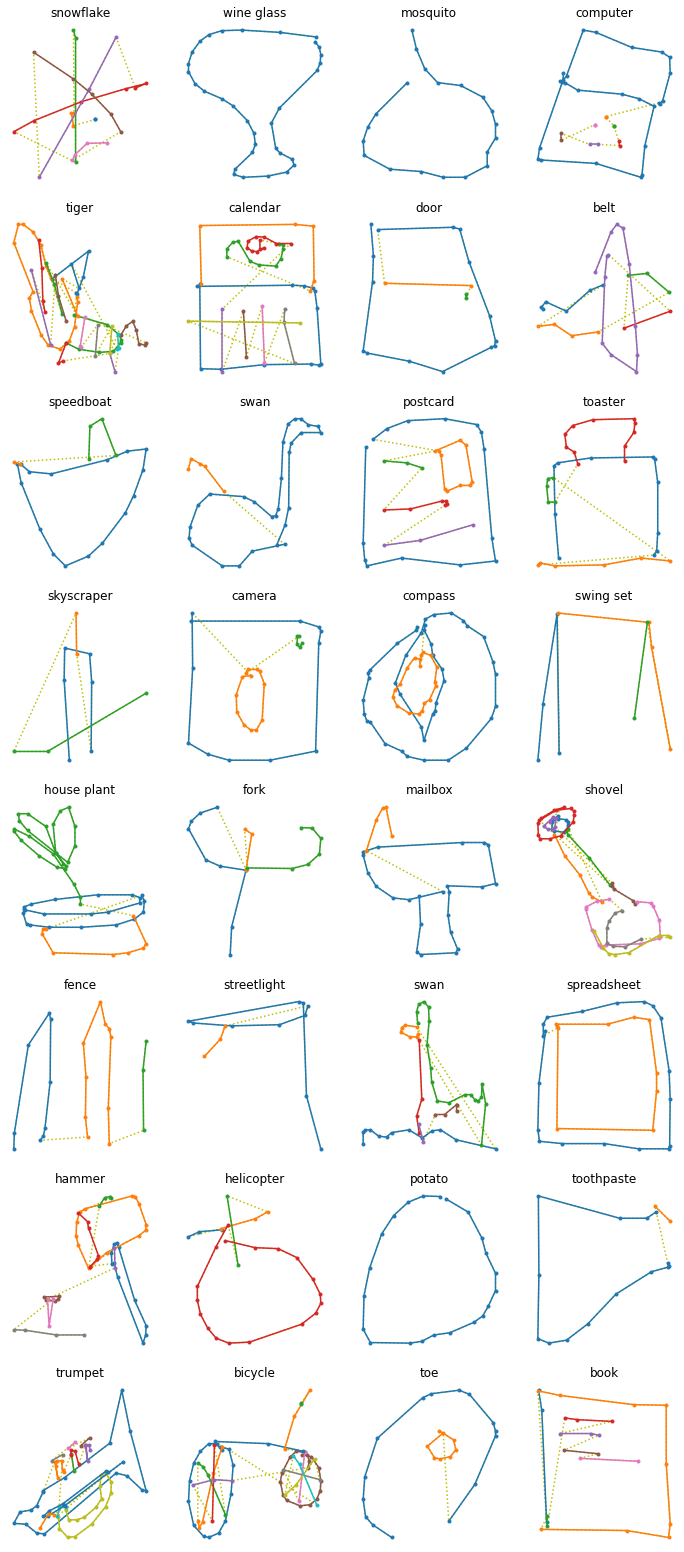

In [28]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

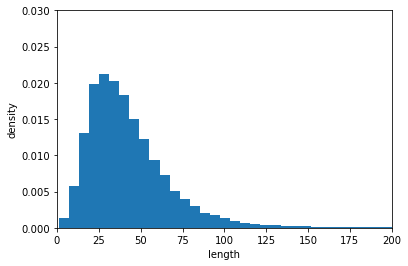

In [30]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [45]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [46]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 6814s 63ms/step - loss: 3.8624 - accuracy: 0.2061 - sparse_top_k_categorical_accuracy: 0.4205 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0000e+00
Epoch 2/2
5389/5390 [============================>.] - ETA: 0s - loss: 2.6258 - accuracy: 0.3936 - sparse_top_k_categorical_accuracy: 0.6852

In [ ]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [ ]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))